## Import

In [30]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create circle dataset
from sklearn.datasets import make_circles

# Split data
from sklearn.model_selection import train_test_split

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

## Functions

In [31]:
def plot_decision_boundary(model, features, labels):
    # define the axis boundaries of the plot
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1

    # create a meshgrid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    if model.output_shape[-1] > 1:
        print("doing multiclass classification")
        # we have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(features[:, 0], features[:, 1], c='b', s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

## Create circles dataset with SKlearn

In [17]:
n_samples = 1000

features, labels = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42
)

#features, labels = tf.constant(features), tf.constant(labels)
features, labels

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

### Visualize the dataset with a table

In [18]:
circles = pd.DataFrame({
    'features0': features[:, 0],
    'features1': features[:, 1],
    'labels': labels
})

circles

,features0,features1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### Visualize the dataset with a plot

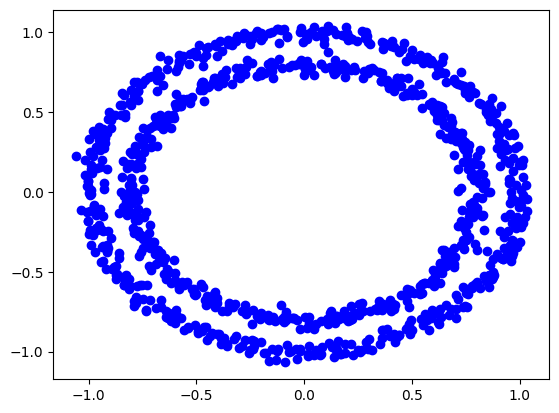

In [19]:
plt.scatter(features[:, 0], features[:, 1], c='b')

## Split the data

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features,
    labels,
    train_size=0.8,
    random_state=42
)

## Build the Model

### Get the best learning rate

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    callbacks=[lr_schedule]
)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

### Plot the history

<Axes: xlabel='epochs'>

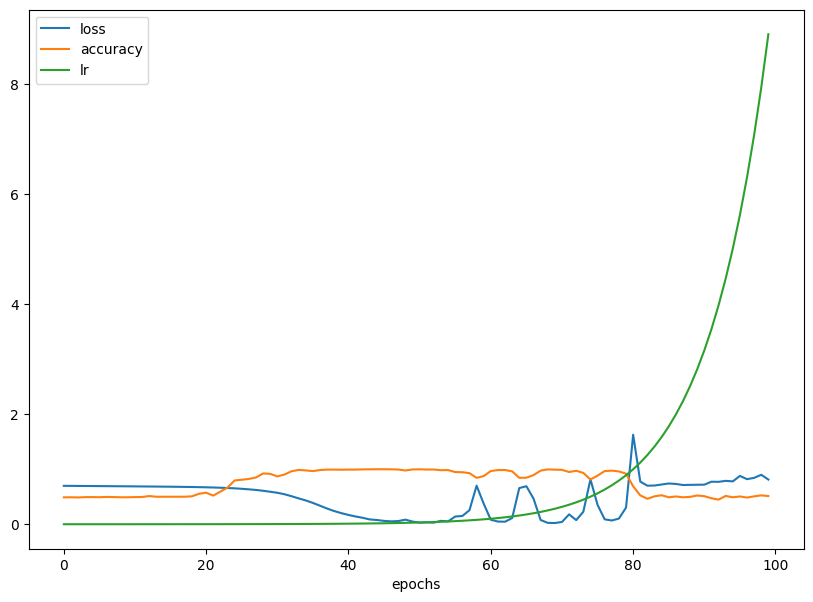

In [22]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')
#plt.title("Model loss curves")

### Plot the Learning rate vs. Loss

Text(0.5, 1.0, 'Learning rate vs. Loss')

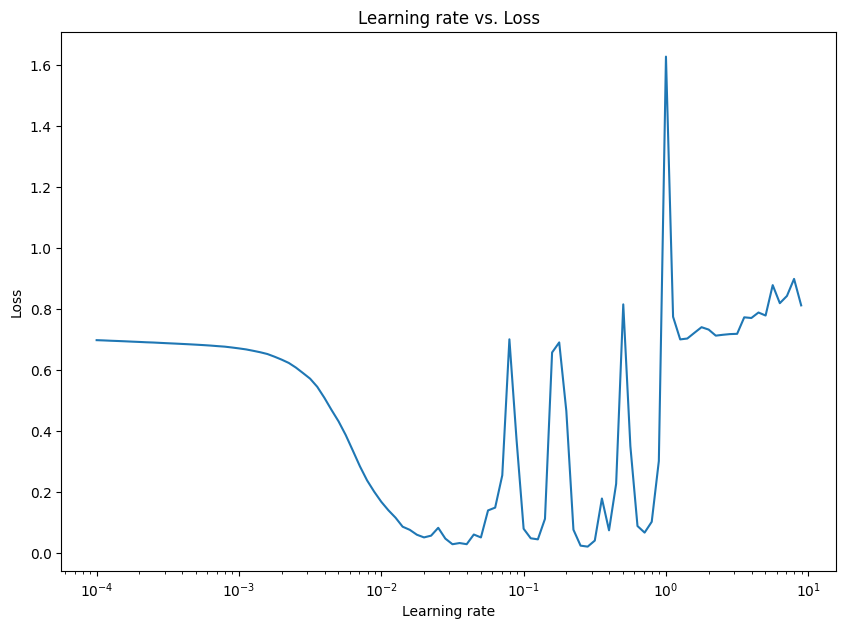

In [23]:
plt.figure(figsize=(10, 7))
plt.semilogx(history.history["lr"], history.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

### Train the Model with the best learning rate

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_features,
    train_labels,
    epochs=20
)

Epoch 1/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5525
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7212
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.8263
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.9325
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.9775
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9875
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9912
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1079 - accuracy: 0.9987
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 1.0000
Epoch 11/20
25/25 [

### Plot the history

<Axes: xlabel='epochs'>

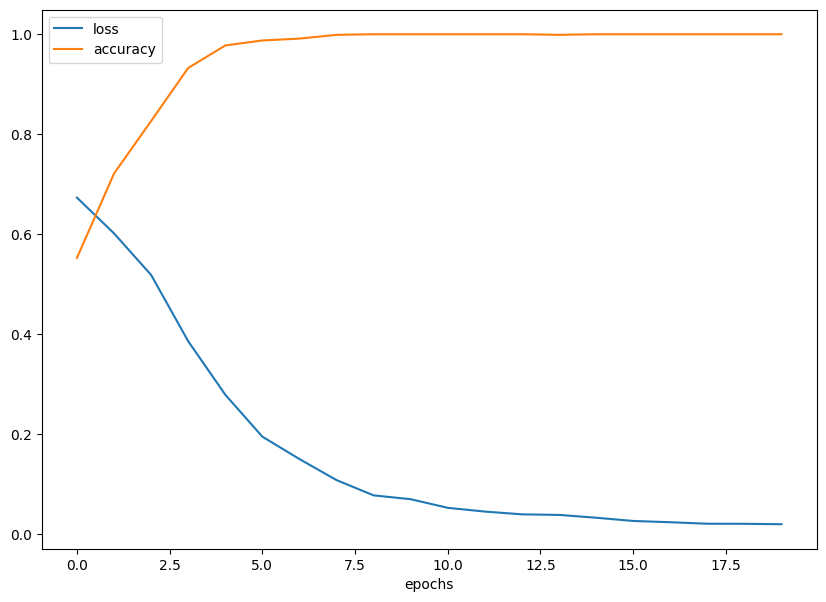

In [25]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')

## Evaluation

In [26]:
model.evaluate(test_features, test_labels)

7/7 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 1.0000


[0.046085745096206665, 1.0]

## Predictions

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


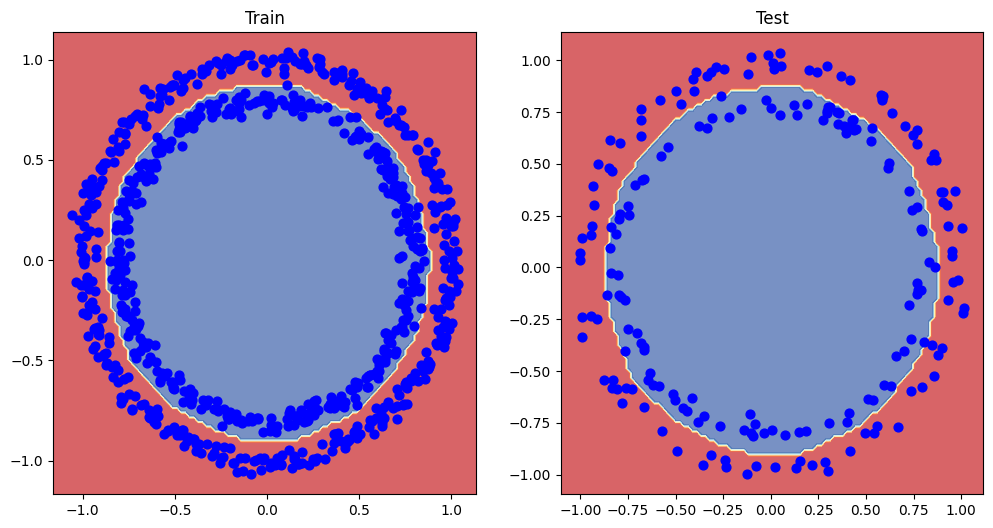

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model, features=train_features, labels=train_labels)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model, features=test_features, labels=test_labels)
plt.show()

## Create confusion matrix

In [29]:
pred_labels = model.predict(test_features)
pred_labels = tf.round(pred_labels) # transform the predictions into binary format
confusion_matrix(test_labels, pred_labels)

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]], dtype=int64)

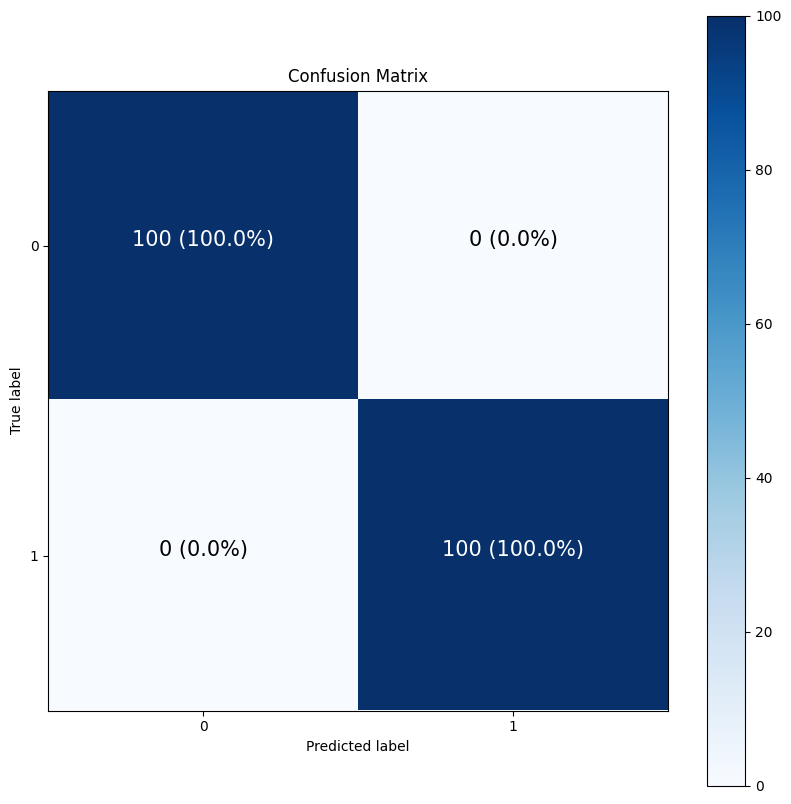

In [32]:
make_confusion_matrix(test_labels, pred_labels)